In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('/content/sample_data/bosch_cleaned_for_eda.csv')
print(df.shape)
df.head()


(9988, 132)


,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S33_F3855,L3_S33_F3857,L3_S33_F3859,L3_S33_F3861,L3_S33_F3863,L3_S33_F3865,Response,min_time,max_time,processing_time
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,-0.119,-0.102,-0.048,-0.119,-0.119,0.026,0,82.24,87.29,5.05
1,6,0.003,0.004,-0.033,-0.034,0.031,0.070,0.000,-0.032,0.000,...,-0.029,-0.026,-0.210,-0.029,-0.029,-0.047,0,1313.12,1315.75,2.63
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,0.199,0.191,0.236,0.199,0.199,0.108,0,1618.70,1624.42,5.72
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,0.017,0.031,0.165,0.017,0.017,0.035,0,1149.20,1154.16,4.96
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,-0.074,-0.049,0.147,-0.074,-0.074,-0.006,0,602.64,606.02,3.38


Text(0.5, 1.0, 'Distribution of Target (Response)')

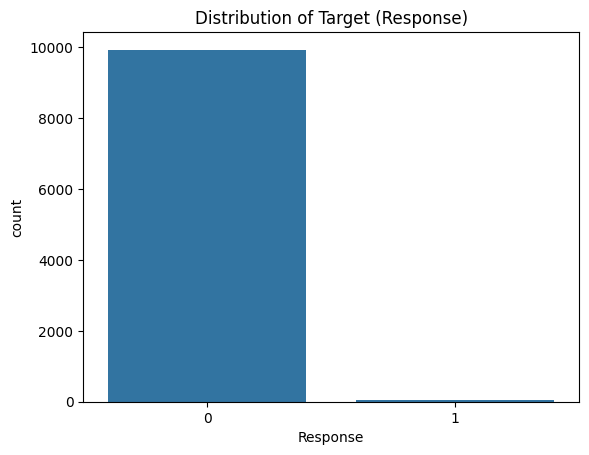

In [5]:
sns.countplot(x='Response', data=df)
plt.title('Distribution of Target (Response)')


Distribution of Target (Response)
The dataset is highly imbalanced: over 99% of samples belong to class 0, while less than 1% belong to class 1. This imbalance must be considered during modeling.


This imbalance must be taken into account during model evaluation. Metrics such as precision, recall, and F1-score are more appropriate than accuracy.

Text(0.5, 1.0, 'Distribution of Processing Time')

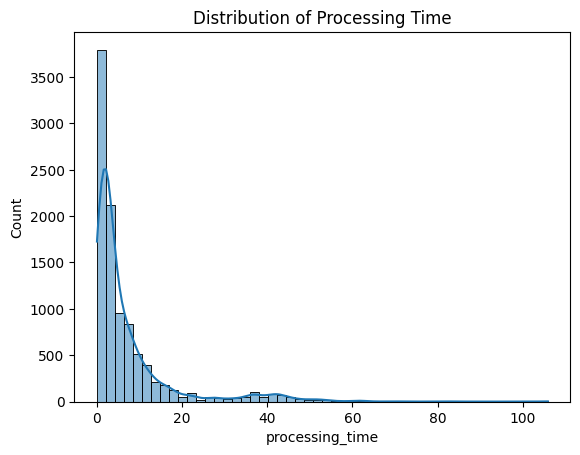

In [6]:
sns.histplot(df['processing_time'], bins=50, kde=True)
plt.title('Distribution of Processing Time')


Distribution of Processing Time
Processing time is right-skewed, with most values concentrated between 0 and 20.

A few extreme values (outliers) go beyond 100.



<Axes: xlabel='Response', ylabel='processing_time'>

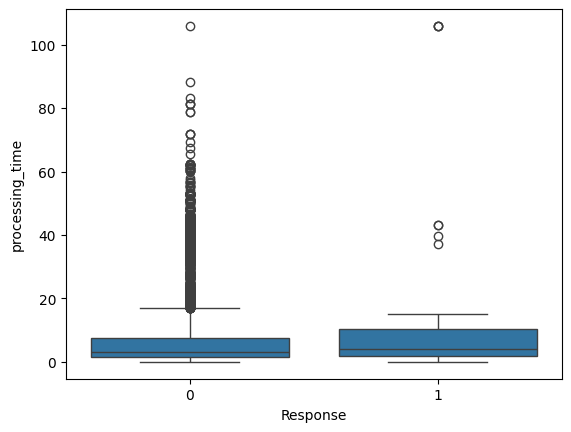

In [7]:
sns.boxplot(x='Response', y='processing_time', data=df)



There is no significant difference in processing time between class 0 and class 1.

Processing time alone may not be a strong predictor of the target.



# correlation_matrix

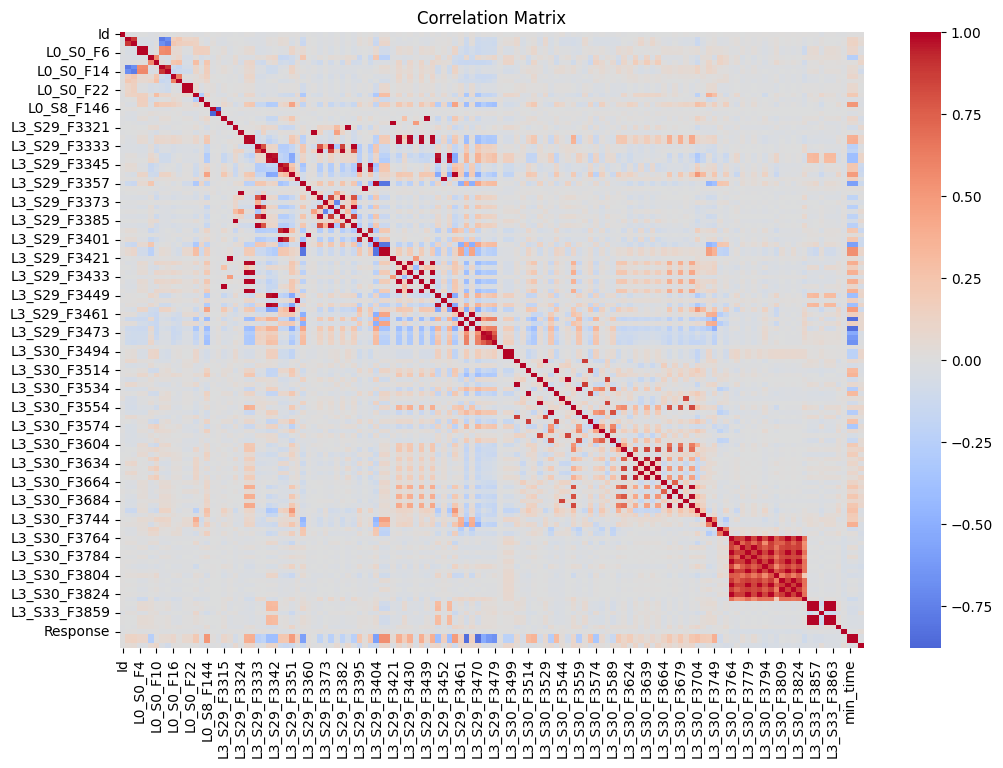

In [8]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [9]:
target_corr = df.corr(numeric_only=True)['Response'].sort_values(ascending=False)
print(target_corr.head(10))  # مهم‌ترین ویژگی‌های مثبت
print(target_corr.tail(10))  # مهم‌ترین ویژگی‌های منفی


Response           1.000000
processing_time    0.042562
L0_S1_F24          0.020752
L3_S29_F3336       0.020237
L3_S29_F3370       0.020237
L3_S29_F3407       0.020201
L3_S29_F3412       0.020201
L3_S29_F3382       0.019201
L3_S30_F3584       0.018292
L3_S30_F3544       0.018263
Name: Response, dtype: float64
L3_S30_F3769   -0.042839
L3_S30_F3784   -0.049471
L3_S30_F3774   -0.049908
L3_S30_F3764   -0.051093
L3_S30_F3789   -0.051178
L3_S30_F3779   -0.051178
L3_S30_F3824   -0.051178
L3_S30_F3814   -0.051178
L3_S30_F3799   -0.051211
L3_S30_F3794   -0.051211
Name: Response, dtype: float64


In [13]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Response'])
X = X.drop(columns=['Id'])  # قبل از train_test_split

y = df['Response']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify preserves class balance
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (7990, 130), Test shape: (1998, 130)


In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10)


,0
processing_time,0.031431
L3_S29_F3370,0.027120
L3_S29_F3382,0.025689
L3_S30_F3774,0.022014
L3_S29_F3336,0.021426
L3_S33_F3859,0.021160
max_time,0.020866
min_time,0.019911
L3_S29_F3333,0.015891
L3_S30_F3509,0.015692


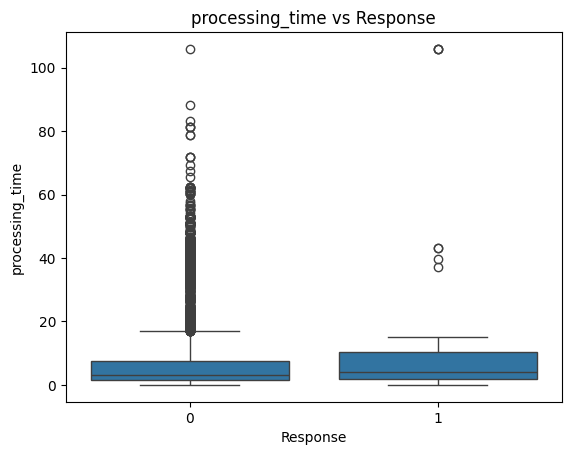

In [31]:
important_features = ['processing_time', 'L3_S29_F3382', 'L3_S30_F3774', 'L3_S29_F3370', 'L3_S29_F3336','L3_S33_F3859','L3_S29_F3333']


sns.boxplot(x='Response', y=important_features[0], data=df)
plt.title(f'{important_features[0]} vs Response')
plt.show()

Slightly higher median for class 1:Slightly higher median for class 1

More outliers in class 0:his is expected, as class 0 dominates the dataset

Distribution overlap:this feature alone isn't sufficient to distinguish classes.



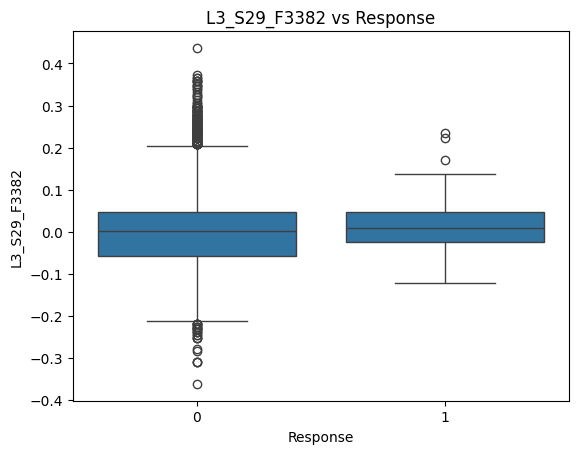

In [25]:
sns.boxplot(x='Response', y=important_features[1], data=df)
plt.title(f'{important_features[1]} vs Response')
plt.show()


L3_S29_F3382 vs Response

Median value is higher for class 1

Class 0 shows more extreme outliers

Some separation exists, but there is still significant overlap between the two classes

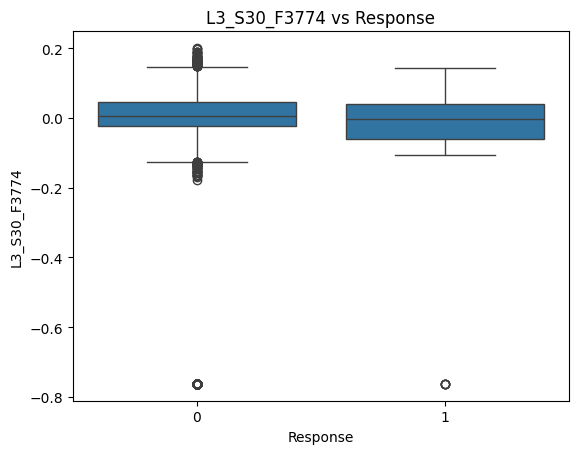

In [26]:
sns.boxplot(x='Response', y=important_features[2], data=df)
plt.title(f'{important_features[2]} vs Response')
plt.show()

L3_S30_F3774 vs Response

Median values are nearly the same for both classes

Slightly more variation in class 0

Overall distributions are very similar → this feature may have limited predictive power on its own

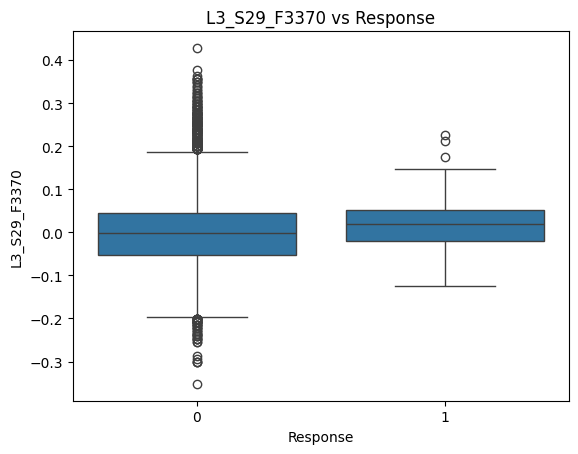

In [27]:
sns.boxplot(x='Response', y=important_features[3], data=df)
plt.title(f'{important_features[3]} vs Response')
plt.show()

L3_S29_F3370 vs Response

Median value is slightly higher for class 1

Class 0 has a wider spread and more outliers

Some separation exists, making this feature potentially useful for classification

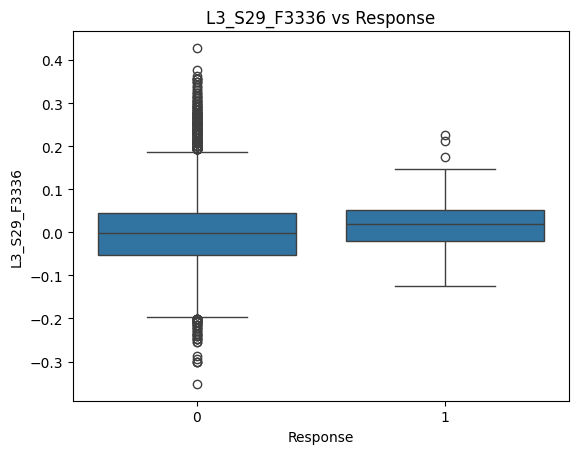

In [28]:
sns.boxplot(x='Response', y=important_features[4], data=df)
plt.title(f'{important_features[4]} vs Response')
plt.show()

L3_S29_F3336 vs Response

Median for class 1 is slightly higher than for class 0

Class 0 shows greater spread and more outliers

Distribution overlap exists, but the feature might still add value to the model

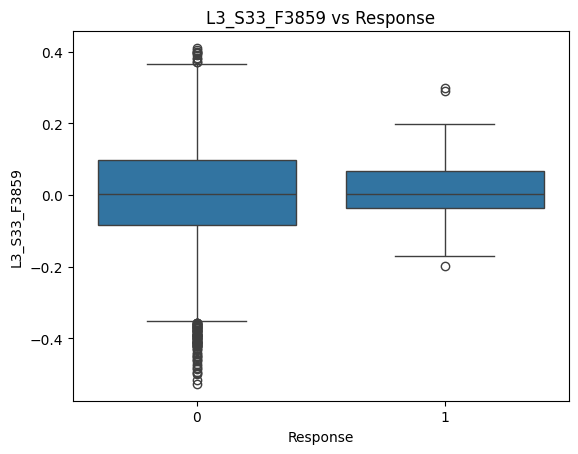

In [29]:
sns.boxplot(x='Response', y=important_features[5], data=df)
plt.title(f'{important_features[5]} vs Response')
plt.show()

## this one shows some interesting structure

L3_S33_F3859 vs Response

Class 1 has a slightly higher and tighter distribution

Class 0 shows more spread and a larger number of outliers

This feature shows mild separation and may support classification when combined with others


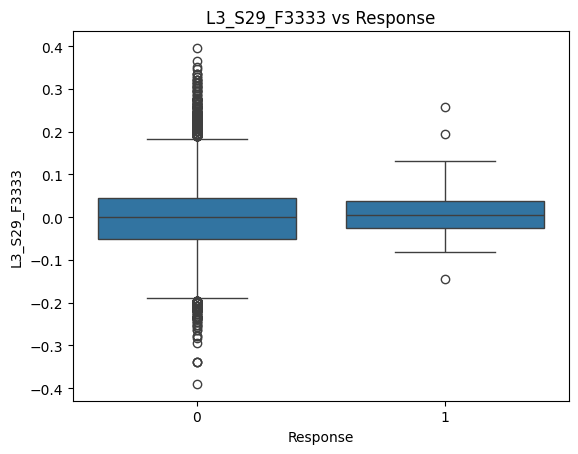

In [30]:
sns.boxplot(x='Response', y=important_features[6], data=df)
plt.title(f'{important_features[6]} vs Response')
plt.show()

L3_S29_F3333 vs Response

Class 1 has a slightly higher median

Class 0 has more extreme values and outliers

Some distribution overlap exists, but the feature may still contribute when combined with others